In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('emails.csv')

In [3]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
data.shape

(5172, 3002)

In [5]:
data.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [6]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
data.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [8]:
data['Prediction'].unique()

array([0, 1], dtype=int64)

In [9]:
x=data.drop(columns=['Prediction','Email No.'])
y=data['Prediction']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (4137, 3000)
x_test shape: (1035, 3000)


In [35]:
#x_train = x_train if isinstance(x_train, pd.DataFrame) else x_train.reshape(-1, x.shape[1])
#x_test = x_test if isinstance(x_test, pd.DataFrame) else x_test.reshape(-1, x.shape[1])

In [12]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [13]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [14]:
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [15]:
acc=accuracy_score(y_test,y_pred)

In [16]:
acc

0.8454106280193237

In [17]:
error=1-acc

In [18]:
error

0.15458937198067635

In [19]:
cf=confusion_matrix(y_test,y_pred)

In [20]:
cf

array([[593, 146],
       [ 14, 282]], dtype=int64)

In [21]:
cr=classification_report(y_test,y_pred)

In [22]:
cr

'              precision    recall  f1-score   support\n\n           0       0.98      0.80      0.88       739\n           1       0.66      0.95      0.78       296\n\n    accuracy                           0.85      1035\n   macro avg       0.82      0.88      0.83      1035\nweighted avg       0.89      0.85      0.85      1035\n'

In [23]:
print(cr)
print(acc)

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       739
           1       0.66      0.95      0.78       296

    accuracy                           0.85      1035
   macro avg       0.82      0.88      0.83      1035
weighted avg       0.89      0.85      0.85      1035

0.8454106280193237


In [24]:
from sklearn.svm import SVC

In [25]:
svm=SVC(kernel='linear',probability=True)
svm.fit(x_train,y_train)
y_pred2=svm.predict(x_test)

In [26]:
acc2=accuracy_score(y_test,y_pred2)
print(acc2)

0.9468599033816425


In [27]:
cf2=confusion_matrix(y_test,y_pred2)
print(cf2)

[[707  32]
 [ 23 273]]


In [28]:
cr2=classification_report(y_test,y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       739
           1       0.90      0.92      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



In [29]:
import seaborn as sns

Text(737.5404040404039, 0.5, 'true')

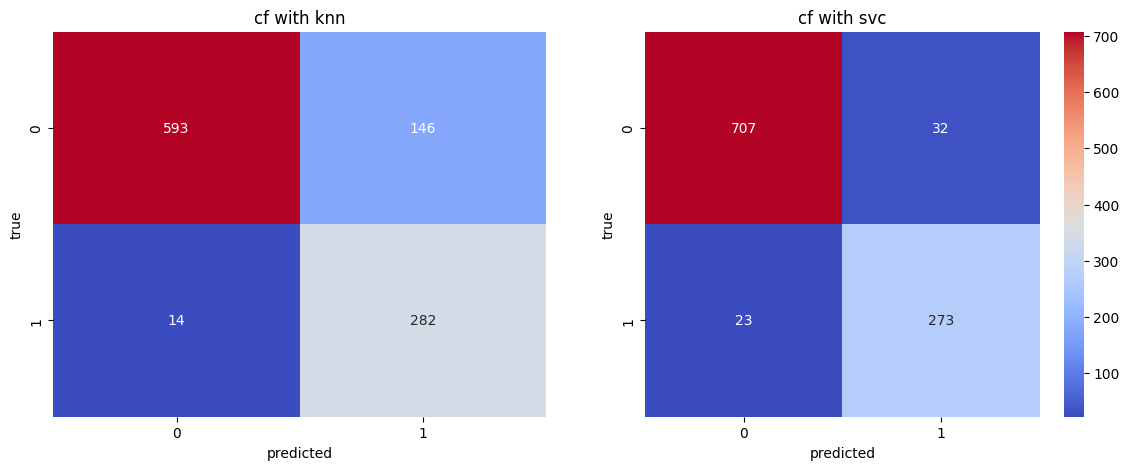

In [30]:
#visualisation 

plt.figure(figsize=(14,5))

#with KNN

plt.subplot(1,2,1)
sns.heatmap(cf,annot=True,fmt="d",cmap="coolwarm",cbar=False)
plt.title("cf with knn")
plt.xlabel("predicted")
plt.ylabel("true")

#with svm

plt.subplot(1,2,2)
sns.heatmap(cf2,annot=True,fmt="d",cmap="coolwarm",cbar="False")
plt.title("cf with svc")
plt.xlabel("predicted")
plt.ylabel("true")